[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/theochem/grid/blob/master/examples/Atom_Grid_Construction.ipynb)

# Construct Atomic Grid

Atomic gris are useful for evaluation, integration, interpolation, and differentiation in three-dimensional (3D) atomic domains. The are constructed by combining a radial and angular grid. The radial grid $\{(r_i, w_i)\}_{i=1}^{N}$ covers the radius coordinate of spherical coordinates, and associted with each radius, there is an angular (Lebedev or Symmetric spherical t-design) grid $\{(\theta^i_j, \phi^i_j, w_j^i)\}_{j=1}^{M_i}$ covering the angle coordinate of spherical coordinates.

This notebook will go over different ways of constructing an [AtomGrid](https://grid.qcdevs.org/pyapi/grid.atomgrid.html#grid.atomgrid.AtomGrid), which provides flexibility in the choice of radial and angular components.


## Atomic Grid `AtomGrid`

[AtomGrid](https://grid.qcdevs.org/pyapi/grid.atomgrid.html#grid.atomgrid.AtomGrid) builds an atomic grid instance given a radial grid and an array of angular grid degrees (or sizes) used for constructing angular grids at each radial grid point. So, in the first step a radial grid needs to be constructed. For more details on the radial and angular grids, see [radial grids](https://grid.qcdevs.org/notebooks/one_dimensional_grids.html) and [angular grids](https://grid.qcdevs.org/notebooks/angular_grid.html).


In [1]:
import numpy as np
from grid import UniformInteger, LinearInfiniteRTransform

# Construct a radial grid with 10 points spanning from r=1e-4 to r=3.0
oned = UniformInteger(npoints=10)
rgrid = LinearInfiniteRTransform(1e-4, 3.0).transform_1d_grid(oned)

print(f"Radial grid size : {rgrid.size}")
print(f"Radial grid r_min: {np.min(rgrid.points):.5f}")
print(f"Radial grid r_max: {np.max(rgrid.points):.5f}")

Radial grid size : 10
Radial grid r_min: 0.00010
Radial grid r_max: 3.00000


Having a radial grid, the angular grid can be specified by the angular grid `degrees` (or `sizes`). If only one value is provided (i.e., list/array of length one), the same angular grid is used for all radial grid points. Otherwise, the `degrees` (or `sizes`) list/array should have the same length as the number of radial grid points. Additionally (A, B, C, and D refer to the atomic grids constructed in the following code block):

- By default the Levedev-Laikov angular grids are used (A, C, and D), unless `method="spherical"` which employs the Symmetric spherical t-design angular grids (B).
- If the provided `degrees` are not available, the closest available `degrees` are used (B).
- To randomly rotate the angular grids at each radial grid point, the `rotate` argument can be used to provide a seed for random rotation matrix (C).


In [2]:
from grid import AtomGrid

# (A) AtomGrid from a radial grid and an angular degree (Levedev-Laikov)
atgrid_ll = AtomGrid(rgrid, degrees=[11])

print(f"AtomGrid A size          : {atgrid_ll.size}")
print(f"AtomGrid A radial size   : {atgrid_ll.rgrid.size}")
print(f"AtomGrid A angular degree: {atgrid_ll.degrees} (Levedev-Laikov)")
print(f"AtomGrid A center        : {atgrid_ll.center}\n")

# (B) AtomGrid from a radial grid and an angular degree (symmetric spherical t-design)
atgrid_ss = AtomGrid(rgrid, degrees=[10], method="spherical")

print(f"AtomGrid B size          : {atgrid_ss.size}")
print(f"AtomGrid B radial size   : {atgrid_ss.rgrid.size}")
print(f"AtomGrid B angular degree: {atgrid_ss.degrees} (symmetric spherical t-design)")
print(f"AtomGrid B center        : {atgrid_ss.center}\n")

# (C) AtomGrid from a radial grid and an angular degree (Levedev-Laikov)
degrees = [30 - 2 * i for i in range(rgrid.size)]
atgrid_ll_degrees = AtomGrid(rgrid, degrees=degrees)

print(f"AtomGrid C size          : {atgrid_ll_degrees.size}")
print(f"AtomGrid C radial size   : {atgrid_ll_degrees.rgrid.size}")
print(f"AtomGrid C angular degree: {atgrid_ll_degrees.degrees} (Levedev-Laikov, multiple degrees)")
print(f"AtomGrid C center        : {atgrid_ll_degrees.center}\n")

# (D) AtomGrid  from a radial grid and an angular size (Levedev-Laikov)
atgrid_ll_size = AtomGrid(rgrid, degrees=None, sizes=[60], rotate=60)

print(f"AtomGrid D size          : {atgrid_ll_size.size}")
print(f"AtomGrid D radial size   : {atgrid_ll_size.rgrid.size}")
print(f"AtomGrid D angular degree: {atgrid_ll_size.degrees} (Levedev-Laikov)")
print(f"AtomGrid D center        : {atgrid_ll_size.center}")

AtomGrid A size          : 500
AtomGrid A radial size   : 10
AtomGrid A angular degree: [11, 11, 11, 11, 11, 11, 11, 11, 11, 11] (Levedev-Laikov)
AtomGrid A center        : [0. 0. 0.]

AtomGrid B size          : 700
AtomGrid B radial size   : 10
AtomGrid B angular degree: [11, 11, 11, 11, 11, 11, 11, 11, 11, 11] (symmetric spherical t-design)
AtomGrid B center        : [0. 0. 0.]

AtomGrid C size          : 1928
AtomGrid C radial size   : 10
AtomGrid C angular degree: [31, 29, 27, 25, 23, 21, 19, 17, 15, 13] (Levedev-Laikov, multiple degrees)
AtomGrid C center        : [0. 0. 0.]

AtomGrid D size          : 740
AtomGrid D radial size   : 10
AtomGrid D angular degree: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13] (Levedev-Laikov)
AtomGrid D center        : [0. 0. 0.]


/home/ali/PythonProjects/grid/src/grid/atomgrid.py:879: UserWarning: Lebedev weights are negative which can introduce round-off errors.
  sphere_grid = AngularGrid(degree=deg_i, method=method)


### Plot `AtomGrid` Points


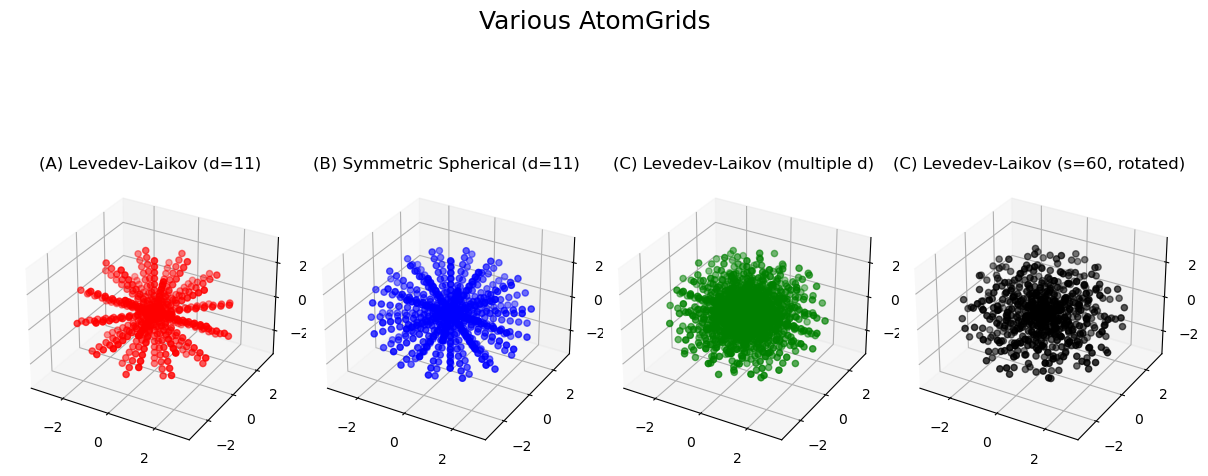

In [3]:
import matplotlib.pyplot as plt

# get the grid points
x1, y1, z1 = atgrid_ll.points.T
x2, y2, z2 = atgrid_ss.points.T
x3, y3, z3 = atgrid_ll_degrees.points.T
x4, y4, z4 = atgrid_ll_size.points.T

# plot the three grids
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(141, projection="3d")
ax1.scatter(x1, y1, z1, c="r", marker="o")
ax1.set_title(f"(A) Levedev-Laikov (d=11)")

ax2 = fig.add_subplot(142, projection="3d")
ax2.scatter(x2, y2, z2, c="b", marker="o")
ax2.set_title(f"(B) Symmetric Spherical (d=11)")

ax3 = fig.add_subplot(143, projection="3d")
ax3.scatter(x3, y3, z3, c="g", marker="o")
ax3.set_title(f"(C) Levedev-Laikov (multiple d)")

ax4 = fig.add_subplot(144, projection="3d")
ax4.scatter(x4, y4, z4, c="k", marker="o")
ax4.set_title(f"(C) Levedev-Laikov (s=60, rotated)")

fig.suptitle("Various AtomGrids", fontsize=18)
plt.tight_layout()
plt.show()

## Pruned Grids `AtomGrid.from_pruned`

**[AtomGrid.from_pruned](https://grid.qcdevs.org/pyapi/grid.atomgrid.html#grid.atomgrid.AtomGrid.from_pruned)** construct an atomic grid given a radial grid, an atom radius, a set of radial sectors `r_sectors` and the degrees (or sizes) of angular grids `d_sectors` for each of the sectors. The `r_sectors` and `d_sectors` should have the same number of elements. This method is useful for constructing atomic grids with different angular grid resolutions for different radial sectors.


AtomGrid size          : 132
AtomGrid radial size   : 10
AtomGrid angular degree: [3, 3, 3, 3, 5, 5, 5, 5, 5, 5] (Levedev-Laikov, multiple degrees)
AtomGrid center        : [0. 0. 0.]


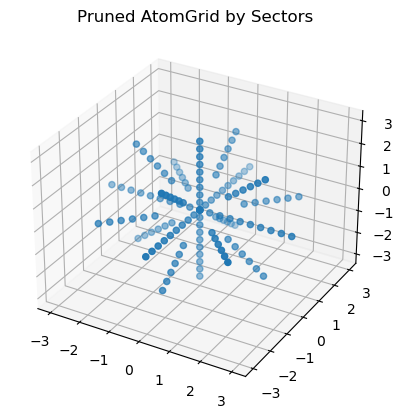

In [4]:
# Create an atom grid using AtomGrid.from_pruned

# example: covalent radius of lithium
radius = 2.418849439520986
# radial sector 1 covers [0, 0.5 * radius], sector 2 covers [0.5 * radius, radius], etc.
# each sector has a different number of angular points defined by d_sectors
# note that the largest radial grid point is at r=3.0, so the last sector is not used
r_sectors = [0.5, 1.0, 1.5]
d_sectors = [3, 4, 5, 7]
atgrid = AtomGrid.from_pruned(rgrid, radius, r_sectors=r_sectors, d_sectors=d_sectors)

print(f"AtomGrid size          : {atgrid.size}")
print(f"AtomGrid radial size   : {atgrid.rgrid.size}")
print(f"AtomGrid angular degree: {atgrid.degrees} (Levedev-Laikov, multiple degrees)")
print(f"AtomGrid center        : {atgrid.center}\n")

# plot grid points
x, y, z = atgrid.points.T
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(x, y, z)
ax.set_title(f"Pruned AtomGrid by Sectors")
plt.show()

## Preset Grids `AtomGrid.from_preset`

**[AtomGrid.from_preset](https://grid.qcdevs.org/pyapi/grid.atomgrid.html#grid.atomgrid.AtomGrid.from_preset)** builds an atomic grid given a radial grid and a preset angular grid name like `coarse`, `medium`, `fine`, `veryfine`, `ultrafine`, and `insane` (the names denote the increasing order of angular grid size) which uses a preset angular degrees for every element denoted by `atnum` (atomic number). In other words, every element has a predefined set of radial sector `r_sectors` and corresponding degrees `d_sectors` which is invoked by the `preset` argument.


AtomGrid A size          : 728
AtomGrid A radial size   : 10
AtomGrid A angular degree: [3, 3, 5, 7, 9, 11, 11, 21, 21, 23] (Levedev-Laikov, coarse Li)
AtomGrid A center        : [0. 0. 0.]

AtomGrid B size          : 1240
AtomGrid B radial size   : 10
AtomGrid B angular degree: [3, 5, 7, 9, 11, 15, 17, 21, 29, 35] (Levedev-Laikov, medium Li)
AtomGrid B center        : [0. 0. 0.]

AtomGrid B size          : 724
AtomGrid B radial size   : 10
AtomGrid B angular degree: [3, 5, 9, 11, 15, 15, 17, 17, 17, 17] (Levedev-Laikov, medium H)
AtomGrid B center        : [0. 0. 0.]


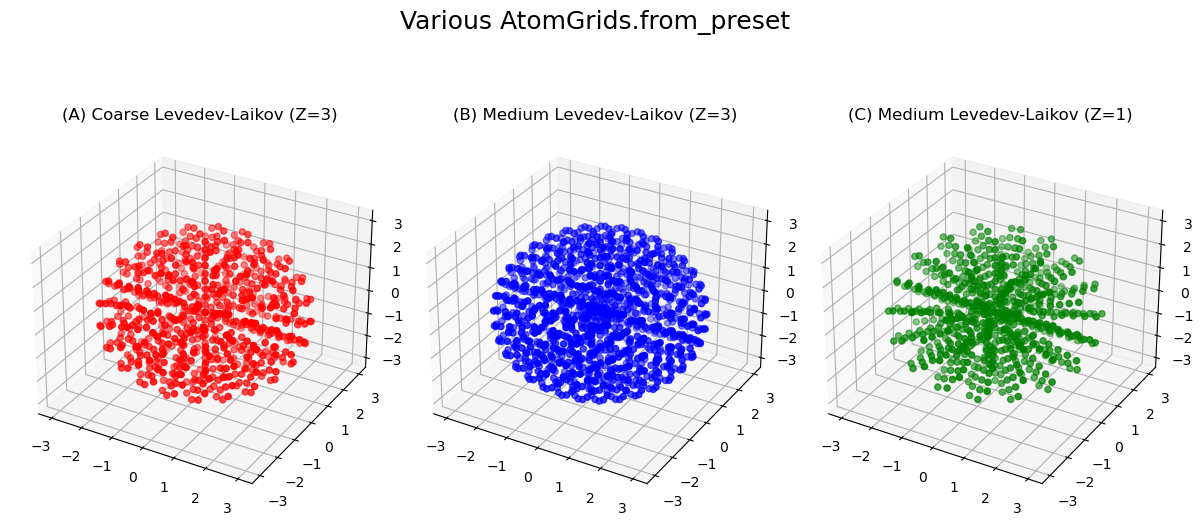

In [5]:
# (A) Construct coarse atomic grid for Li atom
atgrid_coarse = AtomGrid.from_preset(atnum=3, preset="coarse", rgrid=rgrid)

print(f"AtomGrid A size          : {atgrid_coarse.size}")
print(f"AtomGrid A radial size   : {atgrid_coarse.rgrid.size}")
print(f"AtomGrid A angular degree: {atgrid_coarse.degrees} (Levedev-Laikov, coarse Li)")
print(f"AtomGrid A center        : {atgrid_coarse.center}\n")

# (B) Construct medium atomic grid for Li atom
atgrid_medium = AtomGrid.from_preset(atnum=3, preset="medium", rgrid=rgrid)

print(f"AtomGrid B size          : {atgrid_medium.size}")
print(f"AtomGrid B radial size   : {atgrid_medium.rgrid.size}")
print(f"AtomGrid B angular degree: {atgrid_medium.degrees} (Levedev-Laikov, medium Li)")
print(f"AtomGrid B center        : {atgrid_medium.center}\n")

# (C) Construct medium atomic grid for H atom
atgrid_medium_h = AtomGrid.from_preset(atnum=1, preset="medium", rgrid=rgrid)

print(f"AtomGrid B size          : {atgrid_medium_h.size}")
print(f"AtomGrid B radial size   : {atgrid_medium_h.rgrid.size}")
print(f"AtomGrid B angular degree: {atgrid_medium_h.degrees} (Levedev-Laikov, medium H)")
print(f"AtomGrid B center        : {atgrid_medium_h.center}\n")

# Plot AtomicGrid Points
x1, y1, z1 = atgrid_coarse.points.T
x2, y2, z2 = atgrid_medium.points.T
x3, y3, z3 = atgrid_medium_h.points.T

# plot the grid points
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131, projection="3d")
ax1.scatter(x1, y1, z1, c="r", marker="o")
ax1.set_title(f"(A) Coarse Levedev-Laikov (Z=3)")

ax2 = fig.add_subplot(132, projection="3d")
ax2.scatter(x2, y2, z2, c="b", marker="o")
ax2.set_title(f"(B) Medium Levedev-Laikov (Z=3)")

ax3 = fig.add_subplot(133, projection="3d")
ax3.scatter(x3, y3, z3, c="g", marker="o")
ax3.set_title(f"(C) Medium Levedev-Laikov (Z=1)")

fig.suptitle("Various AtomGrids.from_preset", fontsize=18)
plt.tight_layout()
plt.show()

## Multiple Centered AtomGrids

One can build multiple atomic grids with different radial and angular grid resolutions centered at different points in space using the `center` argument. Here we build two atomic grids centered on the x-axis at $x=-4$ and $x=4$ using for $\textbf{H}$ and $\textbf{F}$ atoms, respectively, using [AtomGrid.from_preset](https://grid.qcdevs.org/pyapi/grid.atomgrid.html#grid.atomgrid.AtomGrid.from_preset).


H AtomGrid size : 568 (Levedev-Laikov, coarse)
F AtomGrid size : 1632 (Levedev-Laikov, medium)


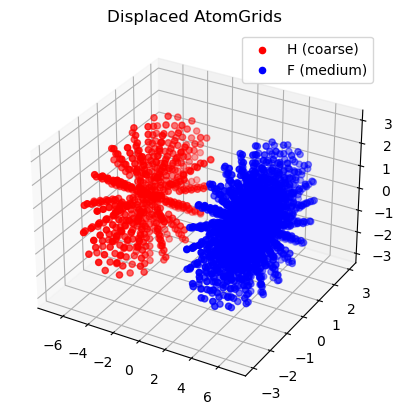

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# center of the atom grid
center = np.array([4.0, 0.0, 0.0])

atgrid_disp_1 = AtomGrid.from_preset(atnum=1, preset="coarse", center=-center, rgrid=rgrid)
atgrid_disp_2 = AtomGrid.from_preset(atnum=9, preset="medium", center=center, rgrid=rgrid)

print(f"H AtomGrid size : {atgrid_disp_1.size} (Levedev-Laikov, coarse)")
print(f"F AtomGrid size : {atgrid_disp_2.size} (Levedev-Laikov, medium)")

# Plot grid points
x1, y1, z1 = atgrid_disp_1.points.T
x2, y2, z2 = atgrid_disp_2.points.T
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(x1, y1, z1, c="r", marker="o", label="H (coarse)")
ax.scatter(x2, y2, z2, c="b", marker="o", label="F (medium)")
ax.set_title(f"Displaced AtomGrids")
ax.legend()
plt.show()